# Customer Lifetime Value (CLV) Prediction
## Model Evaluation & Feature Selection

Building on the transformed data, this notebook aims to **evaluate multiple regressors**, assess the impact of feature selection, and compare linear vs. tree-based models.


In [ ]:
!pip install xgboost lightgbm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
data= pd.read_csv("model_data_final.csv")

In [228]:
data.head()

,Log_TotalSpend,SpendPerOrder,SpendRate,GapPerOrder,Log_SpendRate,PurchaseFreq_Label,OrderHabit_Label,Log_OrderHabit,Recency_QBin,Log_AvgPurchaseGap,Gap_Label,Trend_Refined,Return_Label,Log_Recency,Churn,CLV
0,5.137914,84.68,1.092645,2.565217,0.738429,Rare,Light Buyer,2.564949,Dormant,1.813266,Occasional,Increasing,High Returner,5.049856,0,77183.60
1,6.417598,611.53,20.384333,0.000000,3.062659,Rare,Bulk Buyer,6.234411,Mid Term,0.000000,Single Purchase,Seasonal Buyer,No Return,3.433987,0,4085.18
2,5.407889,222.16,3.471250,0.000000,1.497668,Rare,Bulk Buyer,5.924256,Old,0.000000,Single Purchase,Increasing,No Return,4.174387,0,1797.24
3,7.890635,890.38,80.943636,0.594059,4.406032,Low,Bulk Buyer,5.805135,Mid Term,1.023234,Moderate,Increasing,Occasional Returner,3.526361,0,1757.55
4,5.842965,171.90,343.800000,0.470588,5.842965,Rare,Moderate Buyer,4.553877,Very Recent,0.663294,Frequent,New Buyer,No Return,0.693147,0,1665.74


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Log_TotalSpend      2711 non-null   float64
 1   SpendPerOrder       2711 non-null   float64
 2   SpendRate           2711 non-null   float64
 3   GapPerOrder         2711 non-null   float64
 4   Log_SpendRate       2711 non-null   float64
 5   PurchaseFreq_Label  2711 non-null   object 
 6   OrderHabit_Label    2711 non-null   object 
 7   Log_OrderHabit      2711 non-null   float64
 8   Recency_QBin        2711 non-null   object 
 9   Log_AvgPurchaseGap  2711 non-null   float64
 10  Gap_Label           2711 non-null   object 
 11  Trend_Refined       2711 non-null   object 
 12  Return_Label        2711 non-null   object 
 13  Log_Recency         2711 non-null   float64
 14  Churn               2711 non-null   int64  
 15  CLV                 2711 non-null   float64
dtypes: flo

In [230]:
data.shape

(2711, 16)

In [231]:
ndata=data.copy()

In [232]:
ndata.drop(columns=['Churn'],inplace=True)

In [233]:
ndata

,Log_TotalSpend,SpendPerOrder,SpendRate,GapPerOrder,Log_SpendRate,PurchaseFreq_Label,OrderHabit_Label,Log_OrderHabit,Recency_QBin,Log_AvgPurchaseGap,Gap_Label,Trend_Refined,Return_Label,Log_Recency,CLV
0,5.137914,84.680000,1.092645,2.565217,0.738429,Rare,Light Buyer,2.564949,Dormant,1.813266,Occasional,Increasing,High Returner,5.049856,77183.60
1,6.417598,611.530000,20.384333,0.000000,3.062659,Rare,Bulk Buyer,6.234411,Mid Term,0.000000,Single Purchase,Seasonal Buyer,No Return,3.433987,4085.18
2,5.407889,222.160000,3.471250,0.000000,1.497668,Rare,Bulk Buyer,5.924256,Old,0.000000,Single Purchase,Increasing,No Return,4.174387,1797.24
3,7.890635,890.380000,80.943636,0.594059,4.406032,Low,Bulk Buyer,5.805135,Mid Term,1.023234,Moderate,Increasing,Occasional Returner,3.526361,1757.55
4,5.842965,171.900000,343.800000,0.470588,5.842965,Rare,Moderate Buyer,4.553877,Very Recent,0.663294,Frequent,New Buyer,No Return,0.693147,1665.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,5.486041,240.300000,8.010000,0.000000,2.198335,Rare,Light Buyer,4.317488,Mid Term,0.000000,Single Purchase,New Buyer,No Return,3.433987,173.90
2707,5.731884,307.550000,15.377500,0.000000,2.795908,Rare,Regular Buyer,5.010635,Recent,0.000000,Single Purchase,New Buyer,Occasional Returner,3.044522,180.60
2708,4.798432,120.320000,0.592709,0.000000,0.465437,Rare,Light Buyer,4.532599,Dormant,0.000000,Single Purchase,Decreasing,No Return,5.318120,80.82
2709,6.465787,106.961667,80.221250,0.198690,4.397177,Moderate,Light Buyer,4.043051,Very Recent,0.784878,Moderate,Increasing,No Return,2.197225,1880.93


### Label Encoding 

In [234]:
cols=['PurchaseFreq_Label','OrderHabit_Label','Recency_QBin','Gap_Label','Trend_Refined','Return_Label']
for col in cols:
    print(ndata[col].unique())

['Rare' 'Low' 'Moderate' 'High' 'SuperBuyer']
['Light Buyer' 'Bulk Buyer' 'Moderate Buyer' 'Regular Buyer' 'Heavy Buyer']
['Dormant' 'Mid Term' 'Old' 'Very Recent' 'Recent']
['Occasional' 'Single Purchase' 'Moderate' 'Frequent' 'Rare']
['Increasing' 'Seasonal Buyer' 'New Buyer' 'Decreasing' 'Stable']
['High Returner' 'No Return' 'Occasional Returner' 'Frequent Returner']


In [235]:
from sklearn.preprocessing import OrdinalEncoder

In [236]:
ordering = {
    'PurchaseFreq_Label': ['Rare', 'Low', 'Moderate', 'High', 'SuperBuyer'],
    'OrderHabit_Label': ['Light Buyer', 'Moderate Buyer', 'Regular Buyer', 'Heavy Buyer', 'Bulk Buyer'],
    'Recency_QBin': ['Dormant', 'Old', 'Mid Term', 'Recent', 'Very Recent'],
    'Gap_Label': ['Single Purchase', 'Rare', 'Occasional', 'Moderate', 'Frequent'],
    'Trend_Refined': ['New Buyer', 'Stable', 'Decreasing', 'Seasonal Buyer', 'Increasing'],
    'Return_Label': ['No Return', 'Frequent Returner', 'Occasional Returner', 'High Returner']
}

columns_to_encode = list(ordering.keys())
category_orders = list(ordering.values())

In [237]:
encoder = OrdinalEncoder(categories=category_orders)
ndata[columns_to_encode] = encoder.fit_transform(ndata[columns_to_encode])

In [238]:
ndata[columns_to_encode] = ndata[columns_to_encode].astype(int)

In [239]:
ndata.head()

,Log_TotalSpend,SpendPerOrder,SpendRate,GapPerOrder,Log_SpendRate,PurchaseFreq_Label,OrderHabit_Label,Log_OrderHabit,Recency_QBin,Log_AvgPurchaseGap,Gap_Label,Trend_Refined,Return_Label,Log_Recency,CLV
0,5.137914,84.68,1.092645,2.565217,0.738429,0,0,2.564949,0,1.813266,2,4,3,5.049856,77183.60
1,6.417598,611.53,20.384333,0.000000,3.062659,0,4,6.234411,2,0.000000,0,3,0,3.433987,4085.18
2,5.407889,222.16,3.471250,0.000000,1.497668,0,4,5.924256,1,0.000000,0,4,0,4.174387,1797.24
3,7.890635,890.38,80.943636,0.594059,4.406032,1,4,5.805135,2,1.023234,3,4,2,3.526361,1757.55
4,5.842965,171.90,343.800000,0.470588,5.842965,0,1,4.553877,4,0.663294,4,0,0,0.693147,1665.74


## Model Selection (Baseline model)
### M1: Linear Regression

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [241]:
features = ndata.drop(columns=['CLV','Log_OrderHabit','Log_AvgPurchaseGap'])
target = ndata['CLV']

In [242]:
X_train, X_test, y_train, y_test =train_test_split(features, target, test_size=0.2, random_state=42)

In [243]:
lr_model=LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [244]:
y_pred=lr_model.predict(x_test)

In [245]:
#Performance Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  3344.56
RMSE: 8591.08
R²:   0.1587


#### Poor Performance...
but no worries we have a lot of categorical features as well na

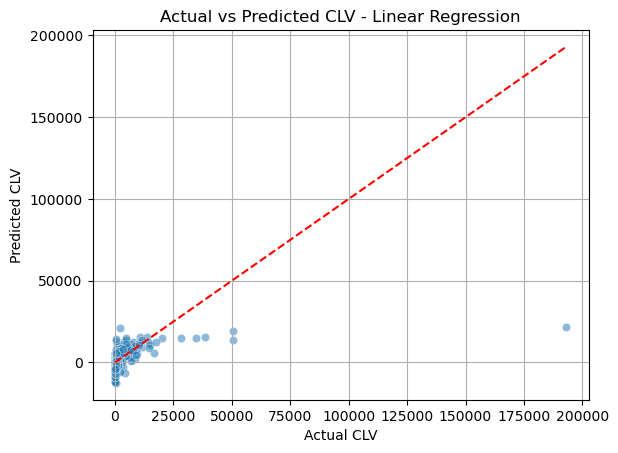

In [246]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted CLV - Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

### M2: Tree-Based Models
- Decision Tree Regressor (baseline)
- Random Forest Regressor
- XGBoost or LightGBM

In [247]:
ndata.head()

,Log_TotalSpend,SpendPerOrder,SpendRate,GapPerOrder,Log_SpendRate,PurchaseFreq_Label,OrderHabit_Label,Log_OrderHabit,Recency_QBin,Log_AvgPurchaseGap,Gap_Label,Trend_Refined,Return_Label,Log_Recency,CLV
0,5.137914,84.68,1.092645,2.565217,0.738429,0,0,2.564949,0,1.813266,2,4,3,5.049856,77183.60
1,6.417598,611.53,20.384333,0.000000,3.062659,0,4,6.234411,2,0.000000,0,3,0,3.433987,4085.18
2,5.407889,222.16,3.471250,0.000000,1.497668,0,4,5.924256,1,0.000000,0,4,0,4.174387,1797.24
3,7.890635,890.38,80.943636,0.594059,4.406032,1,4,5.805135,2,1.023234,3,4,2,3.526361,1757.55
4,5.842965,171.90,343.800000,0.470588,5.842965,0,1,4.553877,4,0.663294,4,0,0,0.693147,1665.74


In [248]:
from sklearn.tree import DecisionTreeRegressor

In [303]:
drop_cols = ['OrderHabit_Label', 'Gap_Label']
model_df = ndata.drop(columns=drop_cols)

In [304]:
X = model_df.drop(columns=['CLV'])
y = model_df['CLV']

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill or drop
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_train.median(), inplace=True)  # Use train stats

In [307]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

In [308]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE: ", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:  ", round(r2, 4))

MAE:  1979.05
RMSE: 6834.5
R²:   0.4676


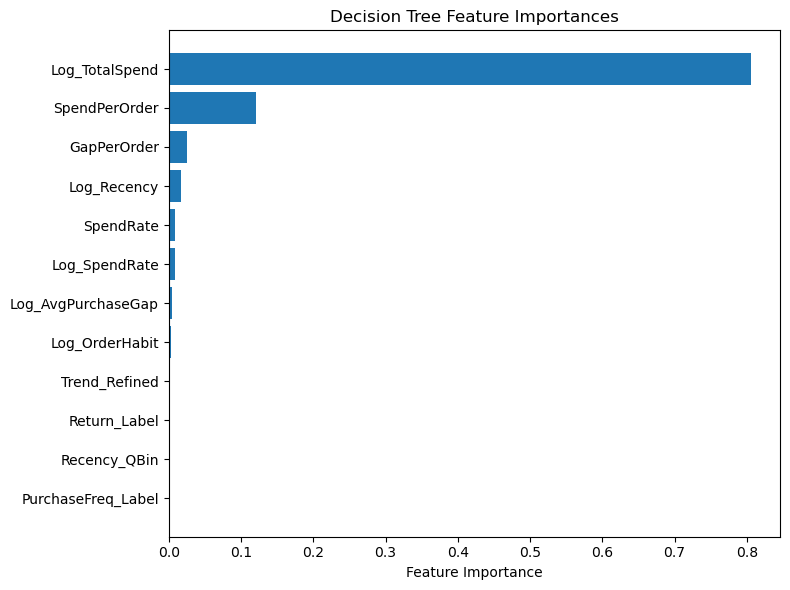

In [309]:
importances = dt_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.show()

In [263]:
from sklearn.ensemble import RandomForestRegressor

In [267]:
drop_cols = ['Log_OrderHabit', 'Log_AvgPurchaseGap']
model_df = ndata.drop(columns=drop_cols)

In [268]:
X = model_df.drop(columns=['CLV'])
y = model_df['CLV']

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [264]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [265]:
y_pred = rf_model.predict(X_test)

In [266]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  1630.06
RMSE: 6953.46
R²:   0.4489


In [182]:
import xgboost as xgb
import lightgbm as lgb

In [188]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [189]:
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
xgb_r2 = r2_score(y_test, xgb_preds)

print("XGBoost Performance:")
print("MAE: ", round(xgb_mae, 2))
print("RMSE:", round(xgb_rmse, 2))
print("R²:  ", round(xgb_r2, 4))

XGBoost Performance:
MAE:  1842.79
RMSE: 7924.81
R²:   0.2841


In [202]:
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

# Metrics
lgb_mae = mean_absolute_error(y_test, lgb_preds)
lgb_rmse = mean_squared_error(y_test, lgb_preds, squared=False)
lgb_r2 = r2_score(y_test, lgb_preds)

print("LightGBM Performance:")
print("MAE: ", round(lgb_mae, 2))
print("RMSE:", round(lgb_rmse, 2))
print("R²:  ", round(lgb_r2, 4))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 284
[LightGBM] [Info] Number of data points in the train set: 2168, number of used features: 7
[LightGBM] [Info] Start training from score 2551.941928
LightGBM Performance:
MAE:  1776.39
RMSE: 7103.69
R²:   0.4248


### Feature Selection

In [310]:
ndata.corr(numeric_only=True)

,Log_TotalSpend,SpendPerOrder,SpendRate,GapPerOrder,Log_SpendRate,PurchaseFreq_Label,OrderHabit_Label,Log_OrderHabit,Recency_QBin,Log_AvgPurchaseGap,Gap_Label,Trend_Refined,Return_Label,Log_Recency,CLV
Log_TotalSpend,1.000000,0.494044,0.293881,-0.114952,0.803811,0.788392,0.507860,0.566154,0.384270,0.121183,0.628114,0.366929,0.460639,-0.403517,0.393471
SpendPerOrder,0.494044,1.000000,0.149810,-0.047300,0.305994,0.075201,0.528532,0.641591,0.040094,-0.101336,0.107758,0.118864,0.115980,-0.049183,0.510423
SpendRate,0.293881,0.149810,1.000000,-0.028715,0.333469,0.251749,0.099532,0.113322,0.165351,-0.055501,0.124403,0.046945,0.102989,-0.215741,0.568140
GapPerOrder,-0.114952,-0.047300,-0.028715,1.000000,-0.082544,-0.099995,-0.088770,-0.104875,-0.007039,0.512475,-0.086129,0.029577,-0.066859,-0.004605,-0.026382
Log_SpendRate,0.803811,0.305994,0.333469,-0.082544,1.000000,0.728541,0.319877,0.360988,0.813168,0.114490,0.561669,0.305531,0.374200,-0.852556,0.339599
PurchaseFreq_Label,0.788392,0.075201,0.251749,-0.099995,0.728541,1.000000,0.099223,0.115427,0.441102,0.146825,0.557467,0.290421,0.457287,-0.459464,0.276308
OrderHabit_Label,0.507860,0.528532,0.099532,-0.088770,0.319877,0.099223,1.000000,0.891597,0.047391,-0.148689,0.169090,0.146333,0.168398,-0.056734,0.168387
Log_OrderHabit,0.566154,0.641591,0.113322,-0.104875,0.360988,0.115427,0.891597,1.000000,0.083305,-0.129240,0.179612,0.160075,0.161177,-0.087664,0.226079
Recency_QBin,0.384270,0.040094,0.165351,-0.007039,0.813168,0.441102,0.047391,0.083305,1.000000,0.094018,0.332874,0.148718,0.195133,-0.945418,0.132729
Log_AvgPurchaseGap,0.121183,-0.101336,-0.055501,0.512475,0.114490,0.146825,-0.148689,-0.129240,0.094018,1.000000,0.140320,0.268204,0.067776,-0.097904,-0.050129


In [324]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [329]:
X = ndata.drop(columns=['CLV']) 
y = ndata['CLV']

In [330]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill remaining NaNs with median of each column (safer for tree models)
X.fillna(X.median(), inplace=True)

In [331]:
model = RandomForestRegressor(random_state=42)

In [332]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [333]:
rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='r2')
rfecv.fit(X, y)

RFECV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestRegressor(random_state=42), scoring='r2')

In [334]:
X_selected = X.loc[:, rfecv.support_]
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", list(X_selected.columns))

Optimal number of features: 2
Selected features: ['Log_TotalSpend', 'SpendPerOrder']


In [337]:
print("\n📈 R² scores vs number of features:")
mean_scores = rfecv.cv_results_['mean_test_score']
for i, score in enumerate(mean_scores, start=1):
    print(f"{i} features: R² = {score:.4f}")


📈 R² scores vs number of features:
1 features: R² = 0.3465
2 features: R² = 0.5899
3 features: R² = 0.5790
4 features: R² = 0.5681
5 features: R² = 0.5641
6 features: R² = 0.5710
7 features: R² = 0.5638
8 features: R² = 0.5532
9 features: R² = 0.5620
10 features: R² = 0.5430
11 features: R² = 0.5520
12 features: R² = 0.5356
13 features: R² = 0.5371
14 features: R² = 0.5322


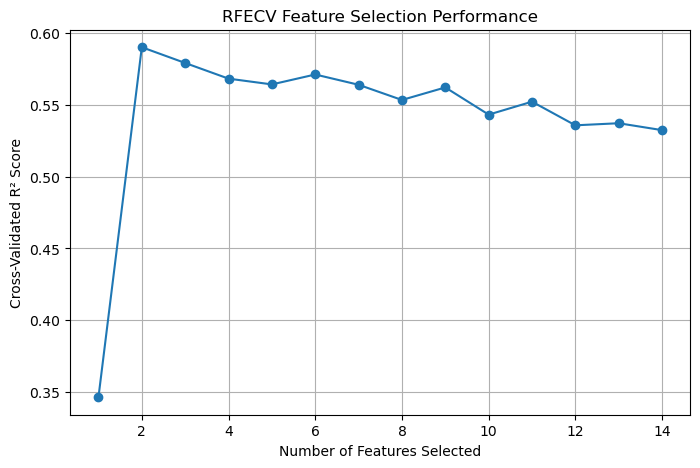

In [338]:

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(mean_scores) + 1), mean_scores, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated R² Score")
plt.title("RFECV Feature Selection Performance")
plt.grid(True)
plt.show()